# Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 


# Using Normalize Function

In [9]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [13]:
# Loading Dataset
data = pd.read_excel('C:/Users/Admin/Downloads/EastWestAirlines.xlsx', sheet_name = 'data')
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


# Data Preprocessing and EDA

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [17]:
# Renaming columns
data = data.rename({'ID#':'ID','Award?':'Award'}, axis = 1)
data.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [19]:
# Checking for all the values in dataset of type integer, if not replacing them with nan
def check_int(df):
    count = 0
    for row in df:
        try:
            if type(row) != int:
                df.loc[count] = np.nan
        except:
            pass
        count +=1

In [21]:
check_int(data[data.columns])

In [23]:
data.isna().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [25]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


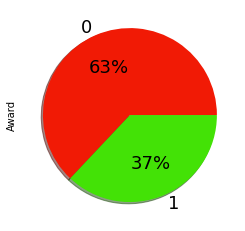

In [27]:
# Checking previously awarded miles ratio
data['Award'].value_counts().plot(kind='pie', autopct='%2.0f%%', fontsize='18', 
                                        colors = ['#F11A05','#43E206'], shadow =True)
plt.show()

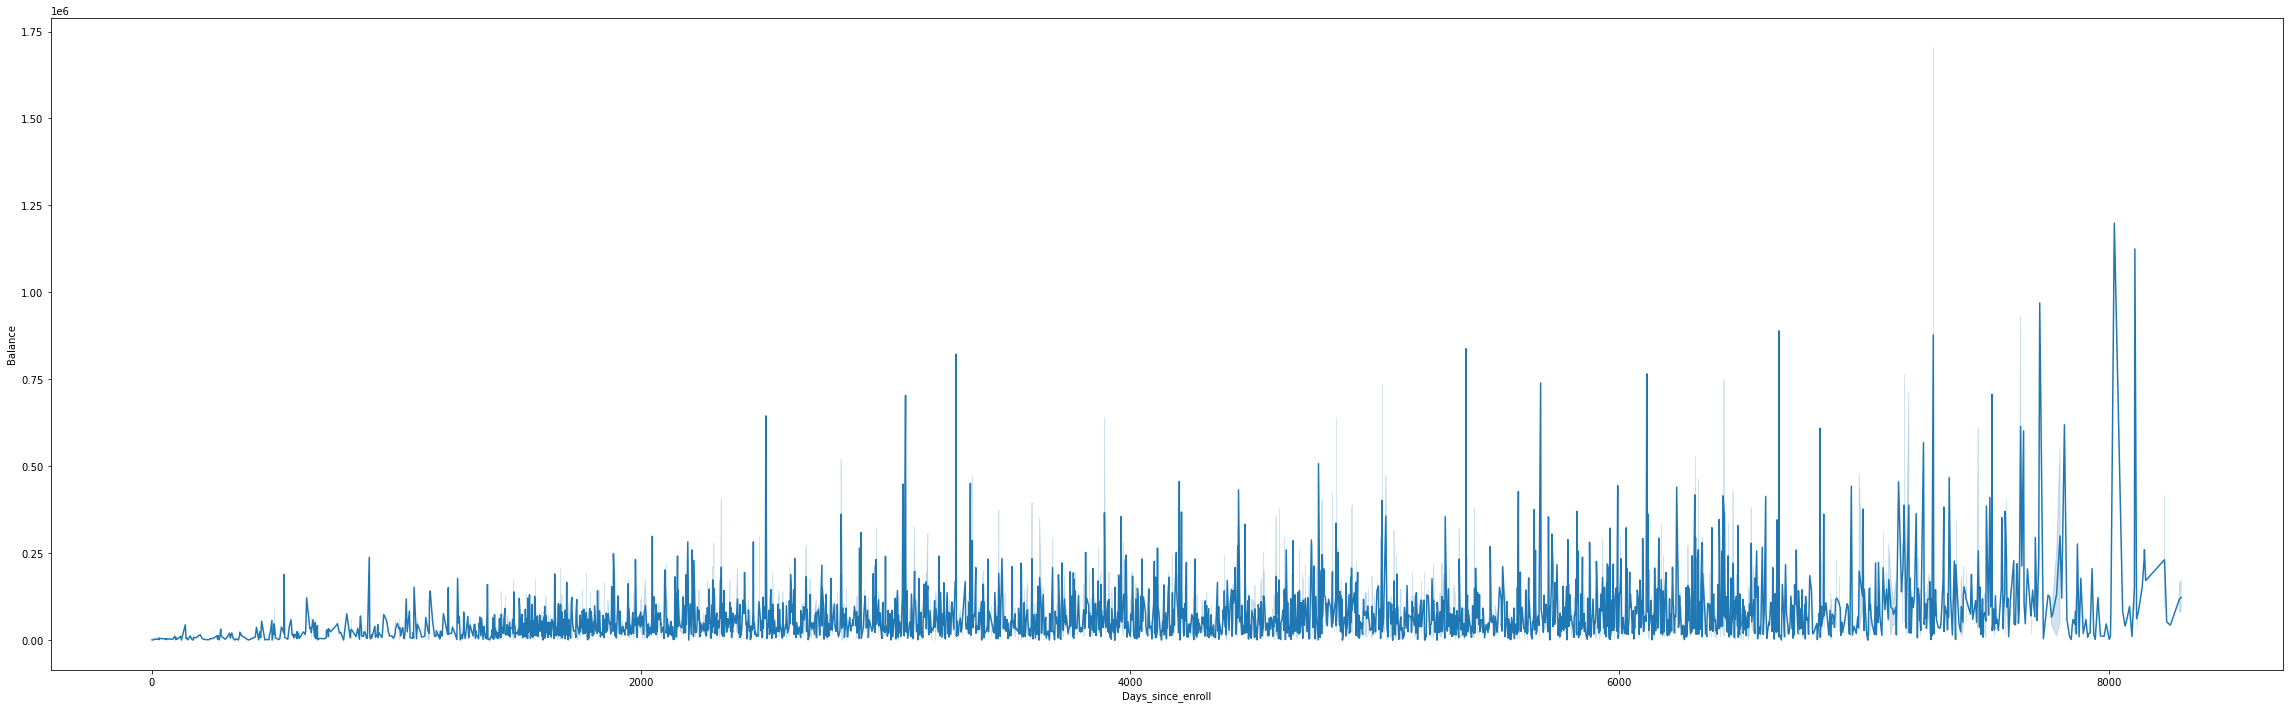

In [29]:
# Checking relation between Balance and Days_since_enroll
import seaborn as sns
fig, ax =plt.subplots(figsize=(40,12))
ax = sns.lineplot(x= 'Days_since_enroll', y='Balance',data = data)

# Agglomerative Clustering

In [31]:
data1 = data.drop('ID', axis = 1)
data1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [33]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [35]:
# We will check clustering for two different scaling functions
scaler1 = MinMaxScaler()
scaler2 = StandardScaler()

In [37]:
# Normalizing Dataset
scaler1_df = scaler1.fit_transform(data1)
print(scaler1_df)

print('\n')

scaler2_df = scaler2.fit_transform(data1)
print(scaler2_df)

[[0.01650773 0.         0.         ... 0.         0.84374246 0.        ]
 [0.01128788 0.         0.         ... 0.         0.83988425 0.        ]
 [0.02425685 0.         0.         ... 0.         0.84784181 0.        ]
 ...
 [0.0431695  0.         0.5        ... 0.         0.16879672 1.        ]
 [0.03220189 0.         0.         ... 0.01886792 0.16867615 0.        ]
 [0.00176908 0.         0.         ... 0.         0.16831444 0.        ]]


[[-4.51140783e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.39545434e+00 -7.66919299e-01]
 [-5.39456874e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.37995704e+00 -7.66919299e-01]
 [-3.20031232e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.41192021e+00 -7.66919299e-01]
 ...
 [-4.29480975e-05 -1.86298687e-01  6.83121167e-01 ... -3.62167870e-01
  -1.31560393e+00  1.30391816e+00]
 [-1.85606976e-01 -1.86298687e-01 -7.69578406e-01 ... -9.85033311e-02
  -1.31608822e+00 -7.66919299e-01]
 [-7.00507951e-01 -1.862

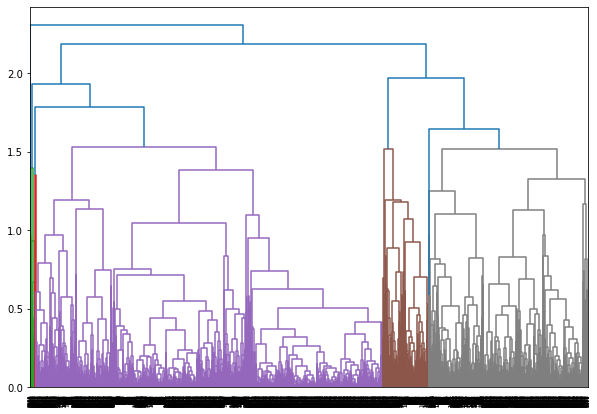

In [39]:
# Create Dendrograms
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(scaler1_df,'complete'))

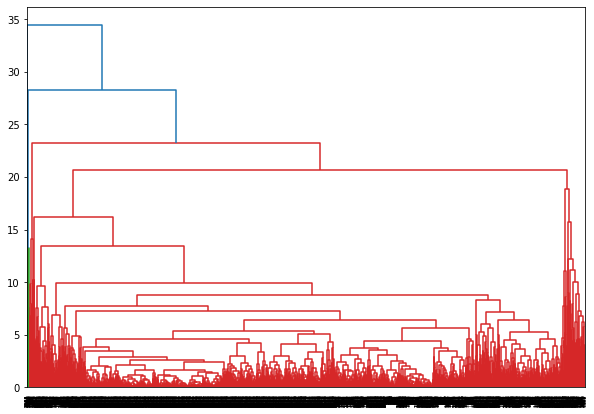

In [41]:
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(scaler2_df,'complete'))


In [43]:
# Creating clusters
H_clusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
H_clusters

AgglomerativeClustering(n_clusters=5)

In [45]:
# Using data normalized by MinMaxScaler 
y=pd.DataFrame(H_clusters.fit_predict(scaler1_df),columns=['clustersid'])
y['clustersid'].value_counts()

1    1011
0     946
2     808
4     699
3     535
Name: clustersid, dtype: int64

In [47]:
# Adding clusters to dataset
# 1. cluster id with scaler_1 i.e. minmaxscaler
data['clustersid_s1']=H_clusters.labels_
data

data1['clustersid_s1']=H_clusters.labels_

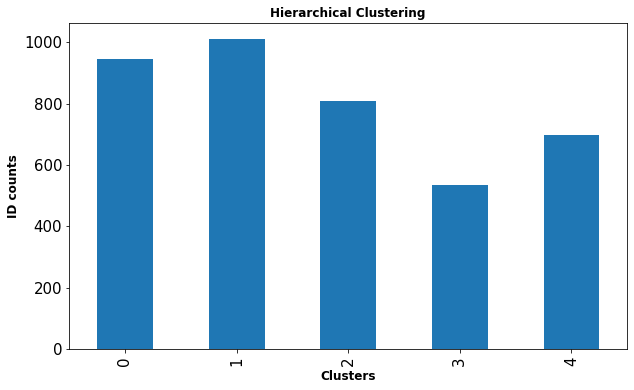

In [49]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['clustersid_s1']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [51]:
data1.groupby('clustersid_s1').agg(['mean']).reset_index()

,clustersid_s1,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,79848.233615,285.097252,1.699789,1.024313,1.000000,12079.774841,12.133192,781.939746,2.369979,4372.173362,1.0
1,1,43313.653808,21.506429,1.000000,1.033630,1.000989,2562.614243,5.474777,169.510386,0.523244,4940.680514,0.0
2,2,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0.0
3,3,127475.028037,160.801869,4.362617,1.000000,1.050467,58656.919626,22.235514,991.110280,3.005607,5072.226168,1.0
4,4,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0.0


In [53]:
# silhouette_score of AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [55]:
sil_score= silhouette_score(scaler1_df, H_clusters.labels_)
sil_score

0.3762586351398372

In [57]:
# Using data normalized by StandardScaler
y=pd.DataFrame(H_clusters.fit_predict(scaler2_df),columns=['clustersid'])
y['clustersid'].value_counts()

1    2446
0    1362
2     130
3      43
4      18
Name: clustersid, dtype: int64

In [59]:
# Adding clusters to dataset
# 1. cluster id with scaler_1 i.e. StandardScaler
data['clustersid_s2']=H_clusters.labels_
data1['clustersid_s2']=H_clusters.labels_

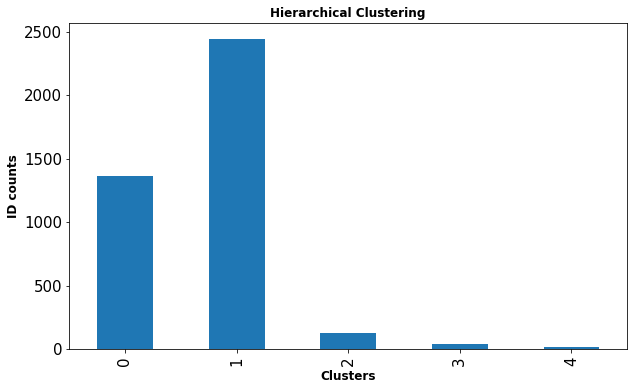

In [61]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['clustersid_s2']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [63]:

data1.groupby('clustersid_s1').agg(['mean']).reset_index()


,clustersid_s1,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s2
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,79848.233615,285.097252,1.699789,1.024313,1.000000,12079.774841,12.133192,781.939746,2.369979,4372.173362,1.0,0.627907
1,1,43313.653808,21.506429,1.000000,1.033630,1.000989,2562.614243,5.474777,169.510386,0.523244,4940.680514,0.0,1.044510
2,2,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0.0,0.507426
3,3,127475.028037,160.801869,4.362617,1.000000,1.050467,58656.919626,22.235514,991.110280,3.005607,5072.226168,1.0,0.261682
4,4,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0.0,1.011445


In [65]:
# silhouette_score of AgglomerativeClustering
from sklearn.metrics import silhouette_score

sil_score= silhouette_score(scaler2_df, H_clusters.labels_)
sil_score

0.30988053078744143

# K-MEANS Clustering

In [70]:
# Import Library
from sklearn.cluster import KMeans
#from yellowbrick.cluster import KElbowVisualizer

In [69]:
# Normalizing Dataset
scaler1_df = scaler1.fit_transform(data1)
print(scaler1_df)

print('\n')

scaler2_df = scaler2.fit_transform(data1)
print(scaler2_df)

[[0.01650773 0.         0.         ... 0.         0.25       0.25      ]
 [0.01128788 0.         0.         ... 0.         0.25       0.25      ]
 [0.02425685 0.         0.         ... 0.         0.25       0.25      ]
 ...
 [0.0431695  0.         0.5        ... 1.         0.         0.        ]
 [0.03220189 0.         0.         ... 0.         1.         0.25      ]
 [0.00176908 0.         0.         ... 0.         1.         0.25      ]]


[[-4.51140783e-01 -1.86298687e-01 -7.69578406e-01 ... -7.66919299e-01
  -5.39219215e-01  4.41786398e-01]
 [-5.39456874e-01 -1.86298687e-01 -7.69578406e-01 ... -7.66919299e-01
  -5.39219215e-01  4.41786398e-01]
 [-3.20031232e-01 -1.86298687e-01 -7.69578406e-01 ... -7.66919299e-01
  -5.39219215e-01  4.41786398e-01]
 ...
 [-4.29480975e-05 -1.86298687e-01  6.83121167e-01 ...  1.30391816e+00
  -1.25111675e+00 -1.17607423e+00]
 [-1.85606976e-01 -1.86298687e-01 -7.69578406e-01 ... -7.66919299e-01
   1.59647340e+00  4.41786398e-01]
 [-7.00507951e-01 -1.862

# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

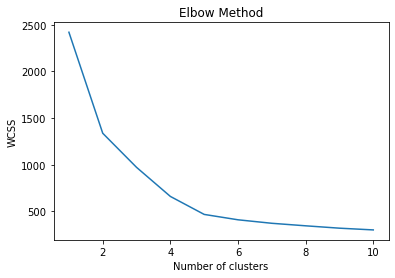

In [72]:
# Using data normalized by MinMaxScaler
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaler1_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

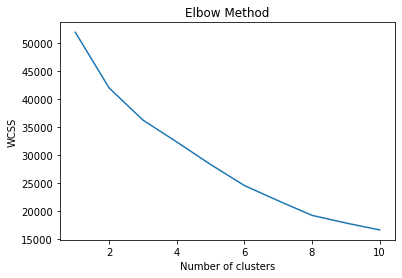

In [74]:
# Using data normalized by StandardScaler
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaler2_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# From above two Scree plots, optimum number of clusters can be selected equal to 5

In [76]:
#Build Cluster algorithm


# Using data normalized by MinMaxScaler
clusters_new1 = KMeans(5, random_state=42)
clusters_new1.fit(scaler1_df)

sil_score= silhouette_score(scaler1_df, clusters_new1.labels_)
print('Silhouette Score for data normalized by MinMaxScaler: ',sil_score)

# Using data normalized by StandardScaler
clusters_new2 = KMeans(5, random_state=42)
clusters_new2.fit(scaler2_df)

sil_score= silhouette_score(scaler2_df, clusters_new2.labels_)
print('Silhouette Score for data normalized by StandardScaler: ',sil_score)

Silhouette Score for data normalized by MinMaxScaler:  0.5578853150250932
Silhouette Score for data normalized by StandardScaler:  0.3294874511326423


In [78]:
#Assign clusters to the data set
data['clusterid_Kmeans'] = clusters_new1.labels_
data1['clusterid_Kmeans'] = clusters_new1.labels_

In [80]:
y=pd.DataFrame(clusters_new1.fit_predict(scaler1_df),columns=['clusterid_Kmeans'])
y['clusterid_Kmeans'].value_counts()

1    1194
0     948
3     699
4     625
2     533
Name: clusterid_Kmeans, dtype: int64

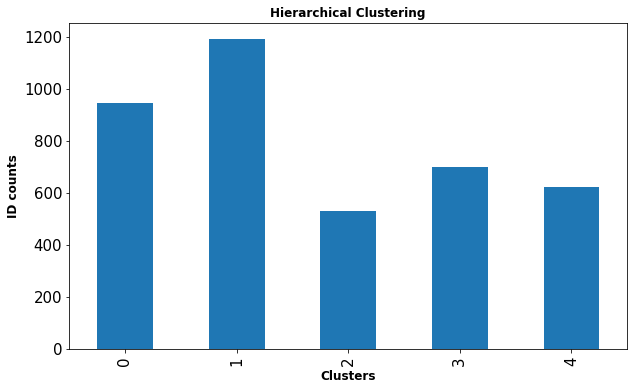

In [82]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['clusterid_Kmeans']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [84]:
data1.groupby('clusterid_Kmeans').agg(['mean']).reset_index()

,clusterid_Kmeans,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s1,clustersid_s2
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,80071.828059,276.433544,1.694093,1.024262,1.002110,12186.982068,12.262658,827.800633,2.483122,4367.631857,1.0,0.009494,0.635021
1,1,46926.743719,77.376884,1.144054,1.028476,1.006700,3747.433836,6.634003,159.219430,0.485762,4834.253769,0.0,1.153266,1.032663
2,2,127256.052533,175.744841,4.382739,1.000000,1.046904,58641.013133,22.043152,910.326454,2.806754,5082.930582,1.0,2.994371,0.247655
3,3,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0.0,4.000000,1.011445
4,4,117737.968000,95.448000,3.566400,1.001600,1.022400,31191.422400,17.337600,226.950400,0.640000,4402.667200,0.0,2.000000,0.372800


# DBSCAN

In [86]:
from sklearn.cluster import DBSCAN

In [88]:
# Normalizing data using MinMaxScaler
scaler1_df = scaler1.fit_transform(data1)
print(scaler1_df)

[[0.01650773 0.         0.         ... 0.25       0.25       0.25      ]
 [0.01128788 0.         0.         ... 0.25       0.25       0.25      ]
 [0.02425685 0.         0.         ... 0.25       0.25       0.25      ]
 ...
 [0.0431695  0.         0.5        ... 0.         0.         0.        ]
 [0.03220189 0.         0.         ... 1.         0.25       0.75      ]
 [0.00176908 0.         0.         ... 1.         0.25       0.75      ]]


# We will try for different values of eps and mn_samples

In [90]:
# Using data normalized by MinMaxScaler
dbscan = DBSCAN(eps=1, min_samples=12)
dbscan.fit(scaler1_df)

DBSCAN(eps=1, min_samples=12)

In [92]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [94]:
y=pd.DataFrame(dbscan.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
y['clusterid_DBSCAN'].value_counts()

 0    2518
 1    1479
-1       2
Name: clusterid_DBSCAN, dtype: int64

In [96]:
# silhouette score
sil_score= silhouette_score(scaler1_df, dbscan.labels_)
sil_score

0.4351796533177913

# As more than 50% of data is in one cluster, we will try for lower value of epsilon

In [102]:
# for epsilon = 0.8
dbscan1 = DBSCAN(eps=0.8, min_samples=12)
dbscan1.fit(scaler1_df)

y=pd.DataFrame(dbscan1.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
print(y['clusterid_DBSCAN'].value_counts())

# silhouette score
sil_score= silhouette_score(scaler1_df, dbscan1.labels_)
print('silhouette score: ',sil_score)

 0    2514
 2     946
 1     531
-1       8
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.4655540837604264


In [104]:
# for epsilon = 0.6
dbscan2 = DBSCAN(eps=0.6, min_samples=12)
dbscan2.fit(scaler1_df)

y=pd.DataFrame(dbscan2.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
print(y['clusterid_DBSCAN'].value_counts())

# silhouette score
sil_score= silhouette_score(scaler1_df, dbscan2.labels_)
print('silhouette score: ',sil_score)

 0    1191
 3     942
 4     699
 2     618
 1     523
-1      26
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.6261231990669098


In [106]:
# for epsilon = 0.5
dbscan3 = DBSCAN(eps=0.5, min_samples=12)
dbscan3.fit(scaler1_df)

y=pd.DataFrame(dbscan3.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
print(y['clusterid_DBSCAN'].value_counts())

# silhouette score
sil_score= silhouette_score(scaler1_df, dbscan3.labels_)
print('silhouette score: ',sil_score)

 0    1166
 3     925
 6     699
 2     615
 1     474
-1      56
 4      48
 5      16
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.5870644557307444


In [108]:
# for epsilon = 0.55
dbscan4 = DBSCAN(eps=0.55, min_samples=12)
dbscan4.fit(scaler1_df)

y=pd.DataFrame(dbscan4.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
print(y['clusterid_DBSCAN'].value_counts())

# silhouette score
sil_score= silhouette_score(scaler1_df, dbscan4.labels_)
print('silhouette score: ',sil_score)

 0    1166
 3     926
 5     699
 2     618
 1     523
-1      30
 4      25
 6      12
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.6075903950018834


# When we have value of epsilon = 0.55, we are getting 6 clusters with data less than 50% in one cluster and also, silhouette score is more as compared to other dbscan models.

In [110]:
data['clusterid_DBSCAN'] = dbscan4.labels_
data1['clusterid_DBSCAN'] = dbscan4.labels_

In [112]:
data.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s1,clustersid_s2,clusterid_Kmeans,clusterid_DBSCAN
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,1,1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,1,1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1,1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,1,1,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3,0,2,1


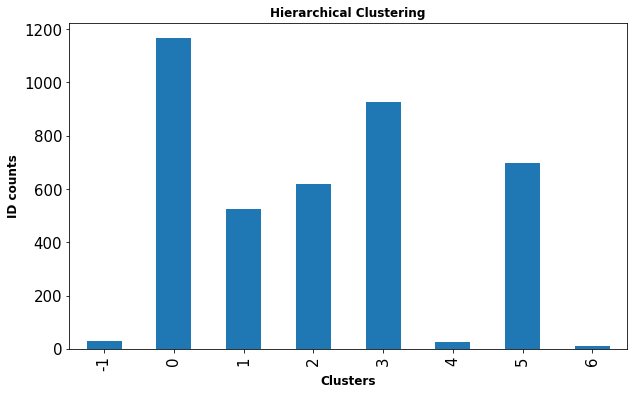

In [114]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['clusterid_DBSCAN']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [116]:
data1.groupby('clusterid_DBSCAN').agg(['mean']).reset_index()

,clusterid_DBSCAN,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s1,clustersid_s2,clusterid_Kmeans
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,183411.700000,429.833333,2.833333,1.333333,2.633333,72041.633333,30.533333,3054.166667,8.600000,4367.433333,0.666667,1.833333,3.200000,1.7
1,0,46899.698971,79.234991,1.147513,1.000000,1.000000,3461.704974,6.469983,159.826758,0.484563,4864.476844,0.000000,1.155232,0.982847,1.0
2,1,128144.883365,159.577438,4.384321,1.000000,1.000000,57731.363289,21.841300,878.879541,2.755258,5092.133843,1.000000,3.000000,0.187380,2.0
3,2,116706.328479,96.529126,3.563107,1.000000,1.000000,30816.666667,17.226537,224.990291,0.634304,4406.014563,0.000000,2.000000,0.333333,4.0
4,3,77576.992441,280.104752,1.707343,1.000000,1.000000,11772.331533,11.903888,768.916847,2.303456,4364.233261,1.000000,0.000000,0.586393,0.0
5,4,43494.400000,0.000000,1.000000,2.360000,1.000000,11483.320000,13.800000,150.000000,0.600000,3544.400000,0.000000,1.000000,3.000000,1.0
6,5,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0.000000,4.000000,1.011445,3.0
7,6,91415.916667,0.000000,1.083333,2.166667,1.000000,12827.666667,19.500000,788.583333,2.166667,4540.583333,1.000000,0.000000,3.000000,0.0


# Dataset: crime_data.csv

In [118]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [120]:
# Loading Dataset
data = pd.read_csv('C:/Users/Admin/Downloads/crime_data.csv')
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# Data Preprocessing and EDA

In [122]:
data = data.rename({'Unnamed: 0':'State'}, axis = 1)

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [126]:
data.isna().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

# Agglomerative Clustering

In [128]:
from sklearn.preprocessing import MinMaxScaler

# Normalizing Dataset

scaler = MinMaxScaler()

scaler_df = scaler.fit_transform(data.iloc[:,1:])
print(scaler_df)

[[0.74698795 0.65410959 0.44067797 0.35917313]
 [0.55421687 0.74657534 0.27118644 0.96124031]
 [0.43975904 0.85273973 0.81355932 0.6124031 ]
 [0.48192771 0.49657534 0.30508475 0.31524548]
 [0.4939759  0.79109589 1.         0.86046512]
 [0.42771084 0.54452055 0.77966102 0.81136951]
 [0.15060241 0.22260274 0.76271186 0.09819121]
 [0.30722892 0.6609589  0.6779661  0.21963824]
 [0.87951807 0.99315068 0.81355932 0.63565891]
 [1.         0.56849315 0.47457627 0.47803618]
 [0.27108434 0.00342466 0.86440678 0.33333333]
 [0.10843373 0.25684932 0.37288136 0.17829457]
 [0.57831325 0.69863014 0.86440678 0.43152455]
 [0.38554217 0.23287671 0.55932203 0.35400517]
 [0.08433735 0.03767123 0.42372881 0.10335917]
 [0.31325301 0.23972603 0.57627119 0.27648579]
 [0.53614458 0.21917808 0.33898305 0.23255814]
 [0.87951807 0.69863014 0.57627119 0.38501292]
 [0.07831325 0.13013699 0.3220339  0.0129199 ]
 [0.63253012 0.87328767 0.59322034 0.52971576]
 [0.21686747 0.35616438 0.89830508 0.23255814]
 [0.68072289 

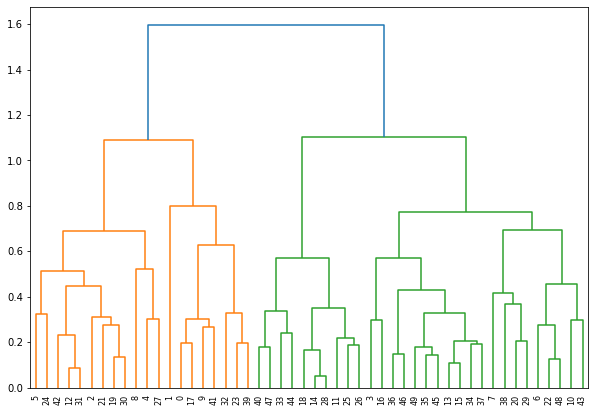

In [130]:
# Create Dendrograms
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(scaler_df,'complete'))

In [132]:
# Creating clusters
H_clusters=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
H_clusters

AgglomerativeClustering(n_clusters=4)

In [134]:
# Using data normalized by MinMaxScaler 
y=pd.DataFrame(H_clusters.fit_predict(scaler_df),columns=['clustersid'])
y['clustersid'].value_counts()

0    18
1    13
2    12
3     7
Name: clustersid, dtype: int64

In [136]:
# Adding clusters to dataset
data['clustersid_HC']=H_clusters.labels_
data

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [138]:
data.groupby('clustersid_HC').agg(['mean']).reset_index()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6260\336832874.py:1: FutureWarning: ['State'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data.groupby('clustersid_HC').agg(['mean']).reset_index()


,clustersid_HC,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,6.055556,140.055556,71.333333,18.683333
1,1,10.815385,257.384615,76.000000,33.192308
2,2,3.091667,76.000000,52.083333,11.833333
3,3,14.671429,251.285714,54.285714,21.685714


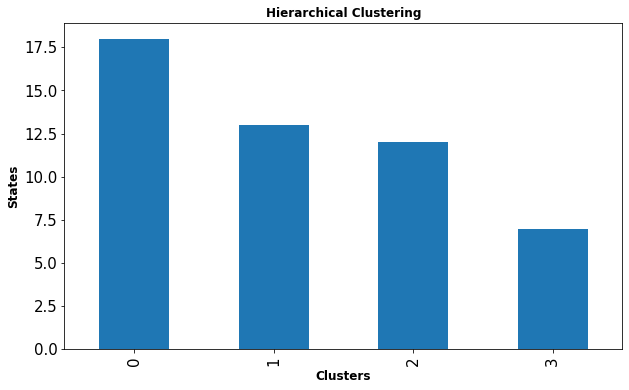

In [140]:
# Plotting barplot using groupby method to get visualization of how states in each cluster
fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['clustersid_HC']).count()['State'].plot(kind='bar')
plt.ylabel('States')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('States', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [142]:
# silhouette_score of AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [144]:
sil_score= silhouette_score(scaler_df, H_clusters.labels_)
sil_score

0.32987073799867844

In [146]:
# States in cluster #0 
data[data['clustersid_HC']==0]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC
3,Arkansas,8.8,190,50,19.5,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
16,Kentucky,9.7,109,52,16.3,0
20,Massachusetts,4.4,149,85,16.3,0
29,New Jersey,7.4,159,89,18.8,0
34,Ohio,7.3,120,75,21.4,0


In [148]:
# States in cluster #1 
data[data['clustersid_HC']==1]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
24,Missouri,9.0,178,70,28.2,1
27,Nevada,12.2,252,81,46.0,1


In [150]:
# States in cluster #2 
data[data['clustersid_HC']==2]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC
11,Idaho,2.6,120,54,14.2,2
14,Iowa,2.2,56,57,11.3,2
18,Maine,2.1,83,51,7.8,2
22,Minnesota,2.7,72,66,14.9,2
25,Montana,6.0,109,53,16.4,2
26,Nebraska,4.3,102,62,16.5,2
28,New Hampshire,2.1,57,56,9.5,2
33,North Dakota,0.8,45,44,7.3,2
40,South Dakota,3.8,86,45,12.8,2
44,Vermont,2.2,48,32,11.2,2


In [152]:
# States in cluster #3 
data[data['clustersid_HC']==3]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC
0,Alabama,13.2,236,58,21.2,3
9,Georgia,17.4,211,60,25.8,3
17,Louisiana,15.4,249,66,22.2,3
23,Mississippi,16.1,259,44,17.1,3
32,North Carolina,13.0,337,45,16.1,3
39,South Carolina,14.4,279,48,22.5,3
41,Tennessee,13.2,188,59,26.9,3


# K-MEANS Clustering

# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


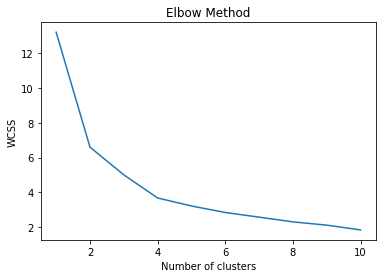

In [155]:
# Using data normalized by MinMaxScaler
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaler_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# From above Scree plot, optimum number of clusters can be selected equal to 4

In [157]:
#Build Cluster algorithm

KM_clusters = KMeans(4, random_state=42)
KM_clusters.fit(scaler_df)

KMeans(n_clusters=4, random_state=42)

In [159]:
y=pd.DataFrame(KM_clusters.fit_predict(scaler_df),columns=['clusterid_Kmeans'])
y['clusterid_Kmeans'].value_counts()

3    17
0    13
1    12
2     8
Name: clusterid_Kmeans, dtype: int64

In [161]:
#Assign clusters to the data set
data['clusterid_Kmeans'] = KM_clusters.labels_
data

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC,clusterid_Kmeans
0,Alabama,13.2,236,58,21.2,3,2
1,Alaska,10.0,263,48,44.5,1,1
2,Arizona,8.1,294,80,31.0,1,1
3,Arkansas,8.8,190,50,19.5,0,2
4,California,9.0,276,91,40.6,1,1
5,Colorado,7.9,204,78,38.7,1,1
6,Connecticut,3.3,110,77,11.1,0,3
7,Delaware,5.9,238,72,15.8,0,3
8,Florida,15.4,335,80,31.9,1,1
9,Georgia,17.4,211,60,25.8,3,2


In [163]:
data.groupby('clusterid_Kmeans').agg(['mean']).reset_index()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6260\3932376145.py:1: FutureWarning: ['State'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data.groupby('clusterid_Kmeans').agg(['mean']).reset_index()


,clusterid_Kmeans,Murder,Assault,UrbanPop,Rape,clustersid_HC
,,mean,mean,mean,mean,mean
0,0,3.600000,78.538462,52.076923,12.176923,1.846154
1,1,10.966667,264.000000,76.500000,33.608333,1.000000
2,2,13.937500,243.625000,53.750000,21.412500,2.625000
3,3,5.852941,141.176471,73.647059,19.335294,0.058824


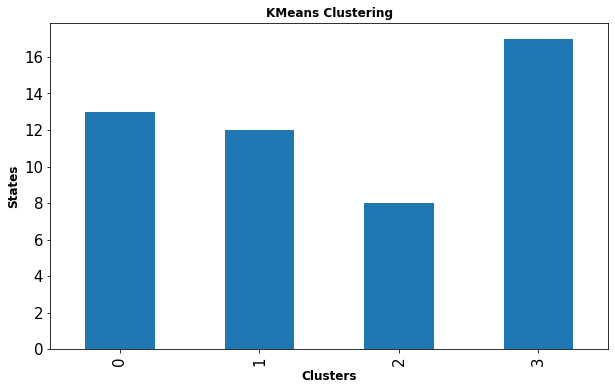

In [165]:
# Plotting barplot using groupby method to get visualization of how states in each cluster
fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['clusterid_Kmeans']).count()['State'].plot(kind='bar')
plt.ylabel('States')
plt.title('KMeans Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('States', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()


In [167]:
# States in cluster #0 
data[data['clusterid_Kmeans']==0]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC,clusterid_Kmeans
11,Idaho,2.6,120,54,14.2,2,0
14,Iowa,2.2,56,57,11.3,2,0
16,Kentucky,9.7,109,52,16.3,0,0
18,Maine,2.1,83,51,7.8,2,0
22,Minnesota,2.7,72,66,14.9,2,0
25,Montana,6.0,109,53,16.4,2,0
26,Nebraska,4.3,102,62,16.5,2,0
28,New Hampshire,2.1,57,56,9.5,2,0
33,North Dakota,0.8,45,44,7.3,2,0
40,South Dakota,3.8,86,45,12.8,2,0


In [169]:
# States in cluster #1 
data[data['clusterid_Kmeans']==1]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC,clusterid_Kmeans
1,Alaska,10.0,263,48,44.5,1,1
2,Arizona,8.1,294,80,31.0,1,1
4,California,9.0,276,91,40.6,1,1
5,Colorado,7.9,204,78,38.7,1,1
8,Florida,15.4,335,80,31.9,1,1
12,Illinois,10.4,249,83,24.0,1,1
19,Maryland,11.3,300,67,27.8,1,1
21,Michigan,12.1,255,74,35.1,1,1
27,Nevada,12.2,252,81,46.0,1,1
30,New Mexico,11.4,285,70,32.1,1,1


In [171]:
# States in cluster #2 
data[data['clusterid_Kmeans']==2]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC,clusterid_Kmeans
0,Alabama,13.2,236,58,21.2,3,2
3,Arkansas,8.8,190,50,19.5,0,2
9,Georgia,17.4,211,60,25.8,3,2
17,Louisiana,15.4,249,66,22.2,3,2
23,Mississippi,16.1,259,44,17.1,3,2
32,North Carolina,13.0,337,45,16.1,3,2
39,South Carolina,14.4,279,48,22.5,3,2
41,Tennessee,13.2,188,59,26.9,3,2


In [173]:
# States in cluster #1 
data[data['clusterid_Kmeans']==2]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC,clusterid_Kmeans
0,Alabama,13.2,236,58,21.2,3,2
3,Arkansas,8.8,190,50,19.5,0,2
9,Georgia,17.4,211,60,25.8,3,2
17,Louisiana,15.4,249,66,22.2,3,2
23,Mississippi,16.1,259,44,17.1,3,2
32,North Carolina,13.0,337,45,16.1,3,2
39,South Carolina,14.4,279,48,22.5,3,2
41,Tennessee,13.2,188,59,26.9,3,2


# DBSCAN

In [175]:
from sklearn.cluster import DBSCAN

# We will try for different values of eps and mn_samples

In [177]:
EPS = [0.22, 0.24, 0.26,0.28, 0.30]

for n in EPS:
    dbscan = DBSCAN(eps=n, min_samples=4)
    dbscan.fit(scaler_df)
    y=pd.DataFrame(dbscan.fit_predict(scaler_df),columns=['clusterid_DBSCAN'])
    print(f'For eps = {n}','\n',y['clusterid_DBSCAN'].value_counts())
    # silhouette score
    sil_score= silhouette_score(scaler_df, dbscan.labels_)
    print(f'For eps silhouette score = {n}','\n', sil_score)

For eps = 0.22 
 -1    32
 0    18
Name: clusterid_DBSCAN, dtype: int64
For eps silhouette score = 0.22 
 0.23530254327069514
For eps = 0.24 
 -1    22
 1    20
 0     4
 2     4
Name: clusterid_DBSCAN, dtype: int64
For eps silhouette score = 0.24 
 0.09406160443056966
For eps = 0.26 
  1    29
-1    17
 0     4
Name: clusterid_DBSCAN, dtype: int64
For eps silhouette score = 0.26 
 0.22475300564355863
For eps = 0.28 
  2    29
-1     8
 1     7
 0     6
Name: clusterid_DBSCAN, dtype: int64
For eps silhouette score = 0.28 
 0.26091229176306663
For eps = 0.3 
  1    37
 0     7
-1     6
Name: clusterid_DBSCAN, dtype: int64
For eps silhouette score = 0.3 
 0.2473858809927262


# When we have value of epsilon = 0.28, we are getting 3 clusters silhouette score is more as compared to other dbscan models.

In [179]:
dbscan = DBSCAN(eps=0.28, min_samples=4)
dbscan.fit(scaler_df)

DBSCAN(eps=0.28, min_samples=4)

In [181]:
data['clusterid_DBSCAN'] = dbscan.labels_
data.head()

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC,clusterid_Kmeans,clusterid_DBSCAN
0,Alabama,13.2,236,58,21.2,3,2,0
1,Alaska,10.0,263,48,44.5,1,1,-1
2,Arizona,8.1,294,80,31.0,1,1,1
3,Arkansas,8.8,190,50,19.5,0,2,2
4,California,9.0,276,91,40.6,1,1,-1


In [183]:
data.groupby('clusterid_DBSCAN').agg(['mean']).reset_index()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6260\4216677319.py:1: FutureWarning: ['State'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data.groupby('clusterid_DBSCAN').agg(['mean']).reset_index()


,clusterid_DBSCAN,Murder,Assault,UrbanPop,Rape,clustersid_HC,clusterid_Kmeans
,,mean,mean,mean,mean,mean,mean
0,-1,10.387500,228.125000,74.125000,32.937500,1.000000,1.62500
1,0,14.216667,258.000000,53.333333,21.000000,3.000000,2.00000
2,1,11.014286,262.571429,77.142857,28.800000,1.000000,1.00000
3,2,4.962069,114.724138,62.896552,16.224138,0.862069,1.62069


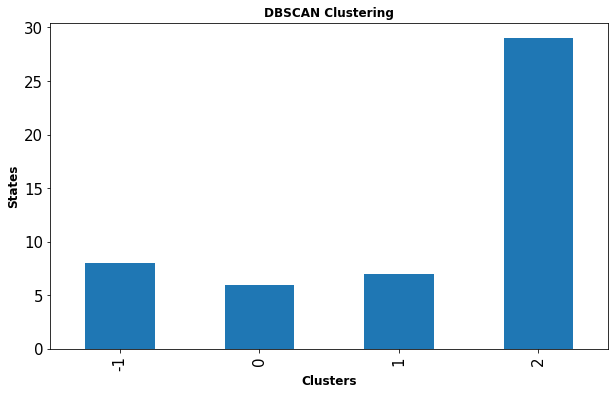

In [185]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['clusterid_DBSCAN']).count()['State'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('States', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()


In [187]:
# States in cluster #0 
data[data['clusterid_DBSCAN']==0]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC,clusterid_Kmeans,clusterid_DBSCAN
0,Alabama,13.2,236,58,21.2,3,2,0
17,Louisiana,15.4,249,66,22.2,3,2,0
23,Mississippi,16.1,259,44,17.1,3,2,0
32,North Carolina,13.0,337,45,16.1,3,2,0
39,South Carolina,14.4,279,48,22.5,3,2,0
41,Tennessee,13.2,188,59,26.9,3,2,0


In [189]:
# States in cluster #1 
data[data['clusterid_DBSCAN']==1]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC,clusterid_Kmeans,clusterid_DBSCAN
2,Arizona,8.1,294,80,31.0,1,1,1
12,Illinois,10.4,249,83,24.0,1,1,1
19,Maryland,11.3,300,67,27.8,1,1,1
21,Michigan,12.1,255,74,35.1,1,1,1
30,New Mexico,11.4,285,70,32.1,1,1,1
31,New York,11.1,254,86,26.1,1,1,1
42,Texas,12.7,201,80,25.5,1,1,1


In [191]:
# States in cluster #2 
data[data['clusterid_DBSCAN']==2]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC,clusterid_Kmeans,clusterid_DBSCAN
3,Arkansas,8.8,190,50,19.5,0,2,2
6,Connecticut,3.3,110,77,11.1,0,3,2
11,Idaho,2.6,120,54,14.2,2,0,2
13,Indiana,7.2,113,65,21.0,0,3,2
14,Iowa,2.2,56,57,11.3,2,0,2
15,Kansas,6.0,115,66,18.0,0,3,2
16,Kentucky,9.7,109,52,16.3,0,0,2
18,Maine,2.1,83,51,7.8,2,0,2
20,Massachusetts,4.4,149,85,16.3,0,3,2
22,Minnesota,2.7,72,66,14.9,2,0,2


In [193]:
# States in cluster #1 
data[data['clusterid_DBSCAN']==-1]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC,clusterid_Kmeans,clusterid_DBSCAN
1,Alaska,10.0,263,48,44.5,1,1,-1
4,California,9.0,276,91,40.6,1,1,-1
5,Colorado,7.9,204,78,38.7,1,1,-1
7,Delaware,5.9,238,72,15.8,0,3,-1
8,Florida,15.4,335,80,31.9,1,1,-1
9,Georgia,17.4,211,60,25.8,3,2,-1
10,Hawaii,5.3,46,83,20.2,0,3,-1
27,Nevada,12.2,252,81,46.0,1,1,-1
